# Week-7

Decision trees and KNN

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [3]:
import math
def safe_log(x, default=0):
    try:
        result = math.log2(x)
    except ValueError:
        result = default
    return result

In [73]:
def entropy(p):
  entropy = -(p*safe_log(p) + (1-p) * safe_log(1-p))
  return entropy
entropy(0.2)

0.7219280948873623

### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

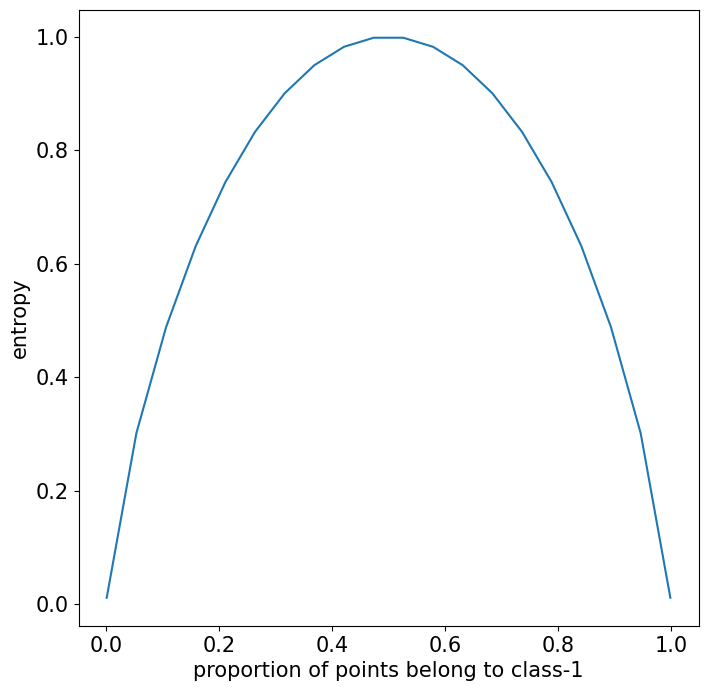

In [5]:
import math
size = 20
p = np.linspace(0.001, 0.999, num = size)
entropies = np.zeros(size)
for i in range(size):
  entropies[i] = entropy(p[i])
plt.plot(p, entropies)
plt.xlabel('proportion of points belong to class-1')
plt.ylabel('entropy')
plt.show()

### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [74]:
def IG(E,El,Er,gamma):
  return E - (gamma * El + (1-gamma) * Er)
E=entropy(200/1000)
El = entropy(50/100)
Er = entropy(150/900)
gamma = 100/1000
IG(E,El,Er,gamma)

0.03690791540384364

### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$.

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [7]:
n=1000
p4 = 0.4
gamma4 = 0.7
left_total = n * gamma4
right_total = n * (1-gamma4)
total_ones = p4 * n
if (total_ones > right_total):
  q_min = (total_ones-right_total)/left_total
else:
  q_min = 0
if (total_ones > left_total):
  q_max = 1
else:
  q_max = total_ones/left_total
print(q_min,q_max)

0.14285714285714277 0.5714285714285714


### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

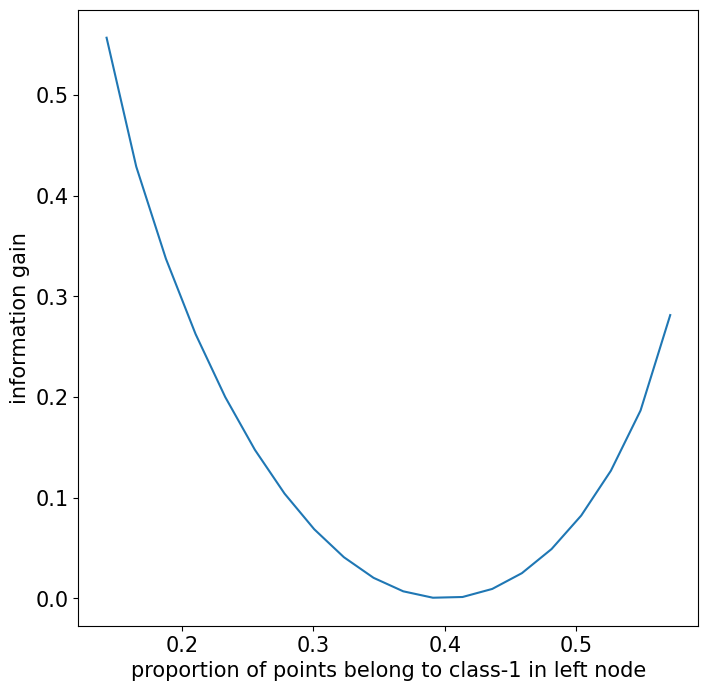

In [8]:
import math
size = 20
n = 1000
p = np.linspace(q_min, q_max, num = size, endpoint=True)
igs = np.zeros(size)
for i in range(size):
  e = entropy(p4)
  total_ones = n * p4
  left_ones_prop = p[i]
  left_total = n * gamma4
  left_ones = left_total * left_ones_prop
  right_ones = total_ones - left_ones
  right_total = n * (1-gamma4)
  qr=right_ones/right_total
  el = entropy(left_ones_prop)
  er = entropy(qr)
  igs[i] = IG(e,el,er,gamma4)
plt.plot(p, igs)
plt.xlabel('proportion of points belong to class-1 in left node')
plt.ylabel('information gain')
plt.show()

### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [9]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

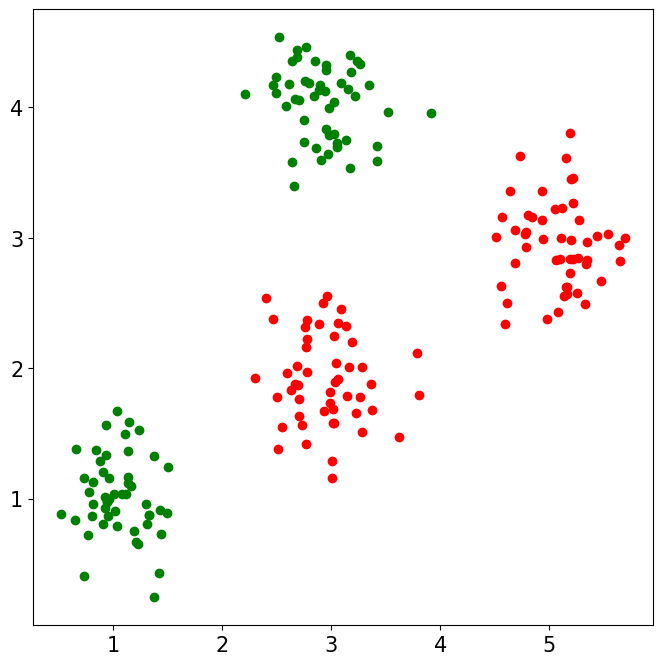

In [10]:
indices_one = np.argwhere(y==1)
indices_zero = np.argwhere(y==0)
plt.scatter(X[indices_one].reshape(-1,2)[:,0],X[indices_one].reshape(-1,2)[:,1],color='green')
plt.scatter(X[indices_zero][:,0, 0],X[indices_zero][:,0, 1],color='red')
plt.show()


### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [11]:
def best_split(X, y):
  m,n = X.shape
  ig_best = -np.inf
  feat_best, value_best = None, None
  for feat_ind in range(n):
    etrpy = entropy(np.mean(y))
    unique_values = np.unique(X[:,feat_ind])
    for value in unique_values:
      y_left = y[X[:,feat_ind]<value]
      y_right = y[X[:,feat_ind]>=value]
      etrpy_left = entropy(np.mean(y_left))
      etrpy_right = entropy(np.mean(y_right))
      ig = IG(etrpy, etrpy_left, etrpy_right, y_left.shape[0]/y.shape[0])
      if(ig_best<ig):
        feat_best = feat_ind
        value_best = value
        ig_best = ig
  return feat_best, value_best, ig_best
best_split(X,y)

(0, 2.2996223648670857, 0.31925145895127793)

### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [21]:
class Node:
  def __init__(self, feature=None, threshold = None,left_child=None, right_child = None, value = None):
    self.feature=feature
    self.threshold=threshold
    self.left_child=left_child
    self.right_child=right_child
    self.value=value

  def __str__(self):
    return f"feature:{self.feature},threshold:{self.threshold},left_child:{self.left_child},right_child:{self.right_child},value:{self.value}"

In [22]:
def build_tree(X,y):
  unique_values = np.unique(y)
  if(len(unique_values) == 1):
    return Node(value=unique_values[0])
  feat_best, value_best, ig_best=best_split(X,y)
  left_indices = X[:,feat_best] < value_best
  X_left, y_left = X[left_indices], y[left_indices]
  X_right, y_right = X[~left_indices], y[~left_indices]
  left_tree = build_tree(X_left, y_left)
  right_tree = build_tree(X_right, y_right)
  return Node(feature=feat_best, threshold=value_best,left_child=left_tree, right_child=right_tree)


In [23]:
def count_nodes(node):
  if node is None:
    return 0, 0
  if node.left_child is None and node.right_child is None:
    return 0, 1
  left_internal, left_leaf = count_nodes(node.left_child)
  right_internal, right_leaf = count_nodes(node.right_child)
  return left_internal + right_internal + 1, left_leaf + right_leaf


In [24]:
parent_node = build_tree(X,y)
internal_node_count, leaf_node_count = count_nodes(parent_node)
print(internal_node_count, leaf_node_count)

3 4


### Problem-9

Predict the label of the point $(3, 4)$.

In [36]:
def predict_label(parent_node, point):
  # print(parent_node)
  if(parent_node.value is not None):
    return parent_node.value
  feat_ind = parent_node.feature
  feat_value = point[feat_ind]
  feat_threshold = parent_node.threshold
  if (feat_value < feat_threshold) :
    if (parent_node.left_child is None) :
      return parent_node.value
    else:
      return predict_label(parent_node.left_child, point)
  else:
    if (parent_node.right_child is None) :
      return parent_node.value
    else:
      return predict_label(parent_node.right_child, point)

In [35]:
predict_label(parent_node, (5, 3))

'red'

### Problem-10

Plot the decision boundary.

In [47]:
def plot_decision_boundary(node, X, y, ax=None):
    """Plot the decision boundary of the binary tree classifier."""
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = np.array([predict_label(node, (xi, yi)) for xi, yi in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

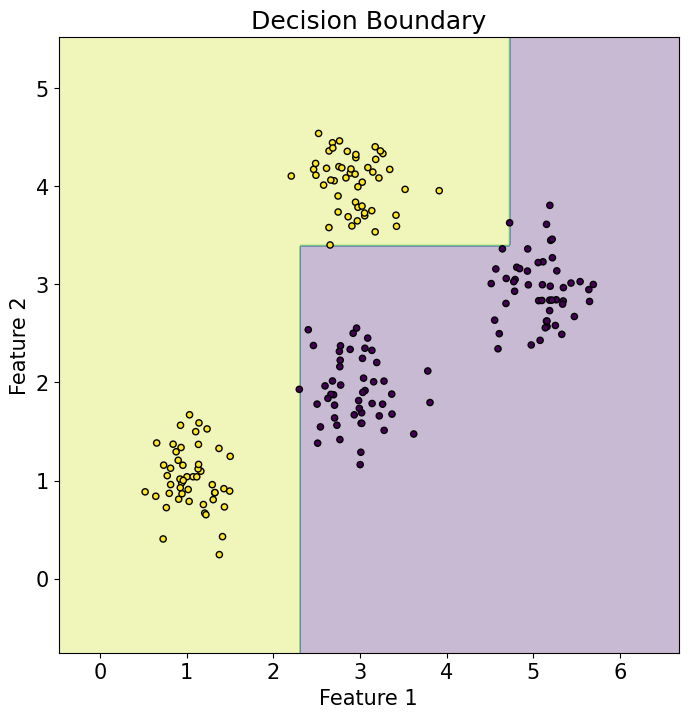

In [48]:
plot_decision_boundary(parent_node, X, y)
plt.show()

## KNN


In [49]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

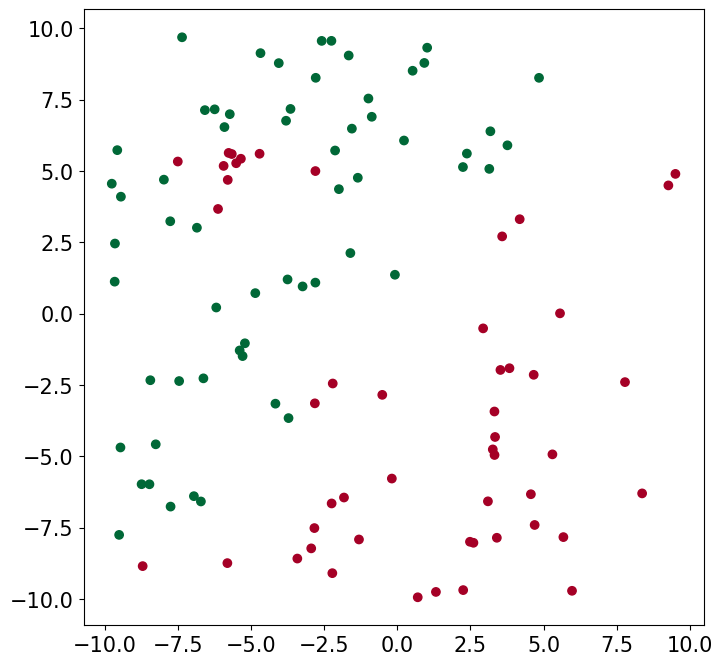

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn')
plt.show()

### Problem-12

Write a function `predict` that accepts the following arguments:

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [62]:
def predict(X, y, x_test, k):
  distances = np.sqrt(np.sum((X-x_test) ** 2, axis=1))
  nearest_indices = np.argsort(distances)[:k]
  k_nearest_labels = y[nearest_indices]
  estimated_label = np.bincount(k_nearest_labels).argmax()
  return estimated_label

In [63]:
k = 10
test_data_point = (-3,-2)
predict(X, y,test_data_point, k)

1

### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

In [64]:
def plot_decision_boundary(X, y,k):
    """Plot the decision boundary of the binary tree classifier."""
    plot_step = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = np.array([predict(X, y, (xi, yi), k) for xi, yi in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

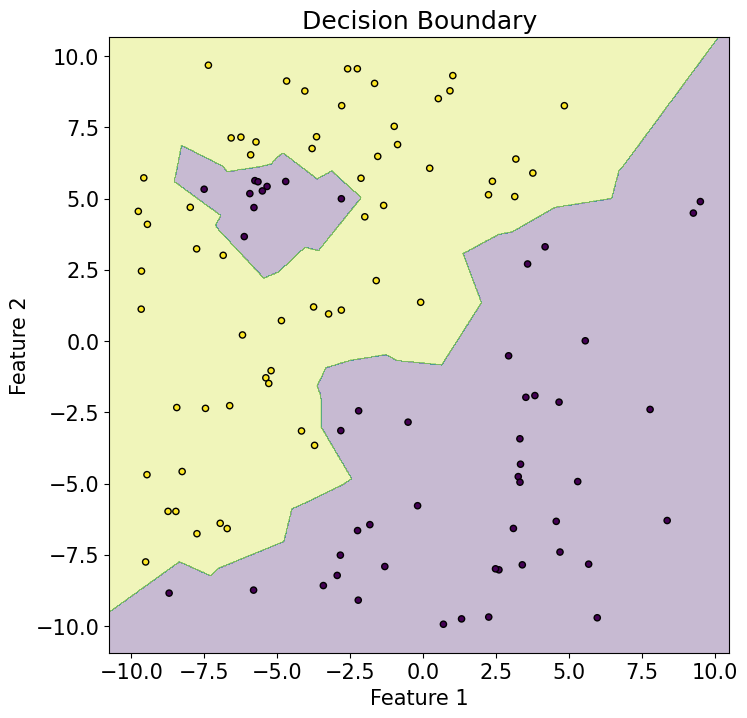

In [66]:
plot_decision_boundary(X, y, 1)
plt.show()

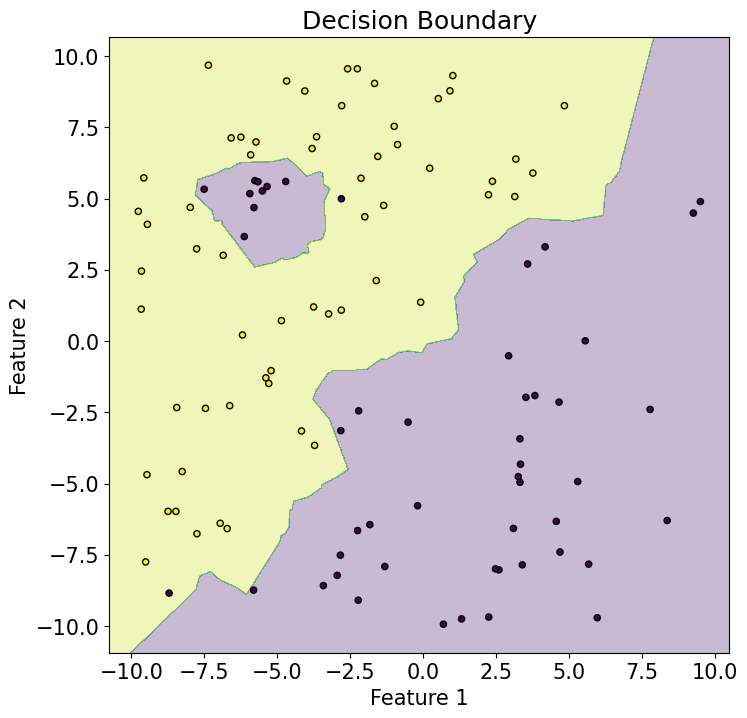

In [67]:
plot_decision_boundary(X, y, 3)
plt.show()

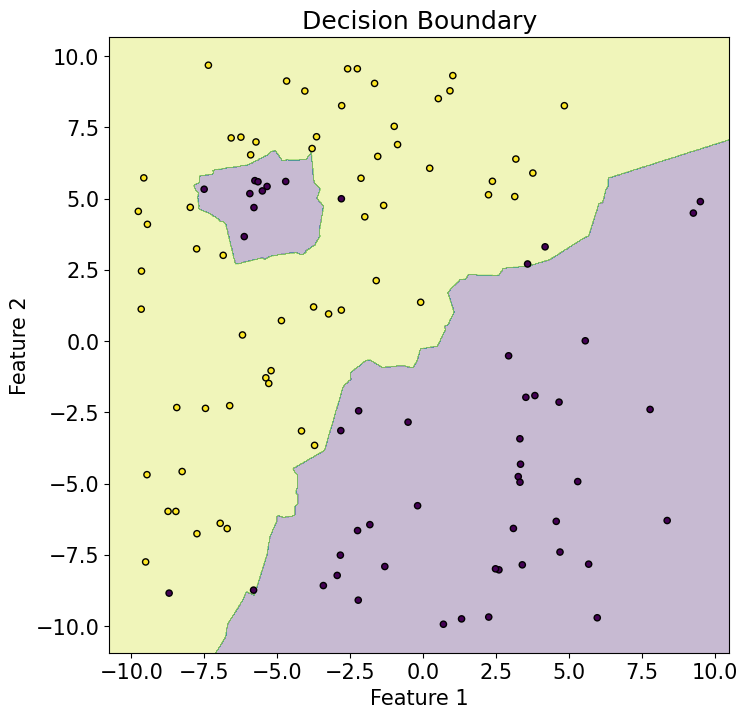

In [68]:
plot_decision_boundary(X, y, 5)
plt.show()

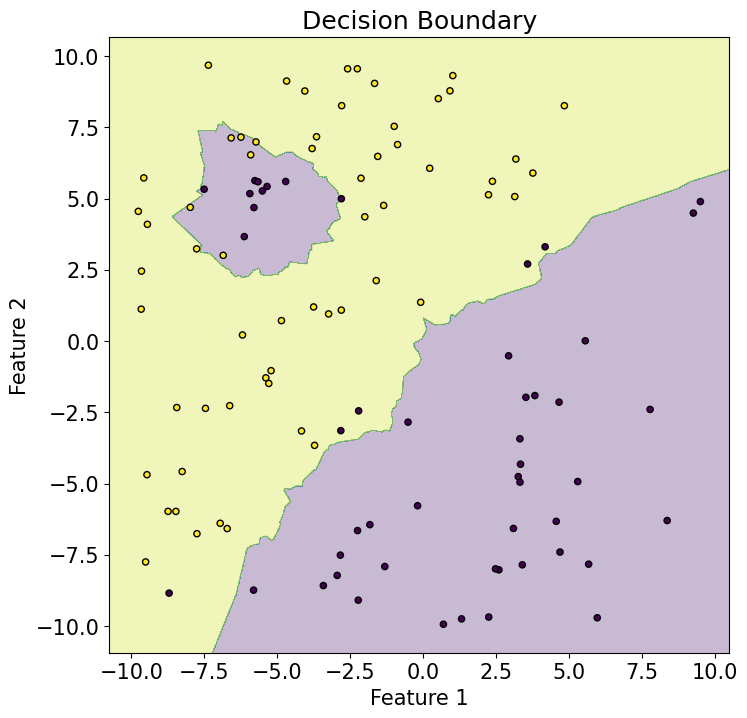

In [69]:
plot_decision_boundary(X, y, 15)
plt.show()

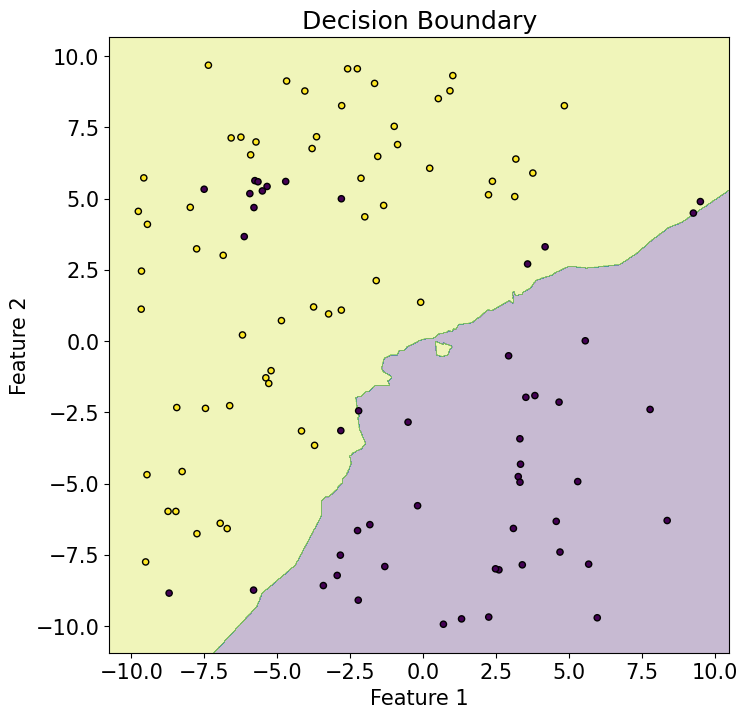

In [70]:
plot_decision_boundary(X, y, 31)
plt.show()

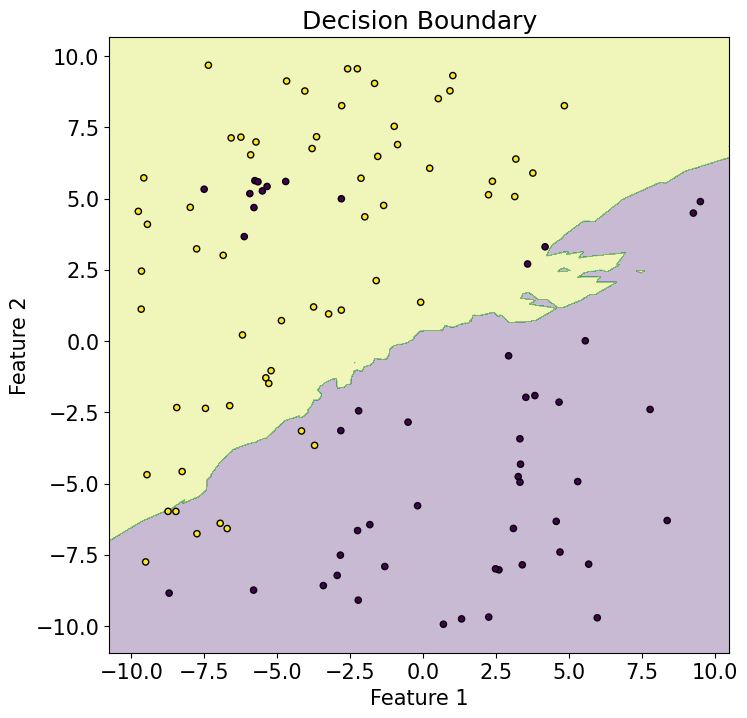

In [71]:
plot_decision_boundary(X, y, 63)
plt.show()